# Análise Exploratória dos Dados
- Vamos começar analisando na base gerada na etapa anterior
- Vamos transformar nossos dados de forma que podemos utilizá-los no modelo

In [2]:
# Importando a base
import pandas as pd
treino =pd.read_csv('train_cleaning.csv')
teste=pd.read_csv('teste_cleaning.csv')

In [3]:
# Visualizando o shape das bases
treino.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,-1,Reg,Lvl,AllPub,...,0,-1,-1,-1,0,5,2007,WD,Normal,181500


In [4]:
# Podemos verificar novamente as informações dessa base
treino.shape

(1460, 81)

In [5]:
# E também a quantidade de colunas de cada tipo
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# Verificando a cardinalidade dos dados
treino.nunique().sort_values(ascending=False).head(10)

Id             1460
LotArea        1073
GrLivArea       861
BsmtUnfSF       780
1stFlrSF        753
TotalBsmtSF     721
SalePrice       663
BsmtFinSF1      637
GarageArea      441
2ndFlrSF        417
dtype: int64

- Exceto o ID, nenhum valor tem uma cardinalidade muito alta e não irei eliminar esse valor pois vamos usar esse dado para fazer a submissão do nosso código 

- **Podemos avaliar diretamente a correlação das variáveis numéricas**

In [7]:
# Verificando a correlação entre os valores
treino.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
GarageYrBlt      0.261354
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.330222
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.472614
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

- **Vamos considerar as colunas OverallQual, BsmtHalfBath que possuem correlação positiva e KitchenAbvGr que possui correlação negativa.**

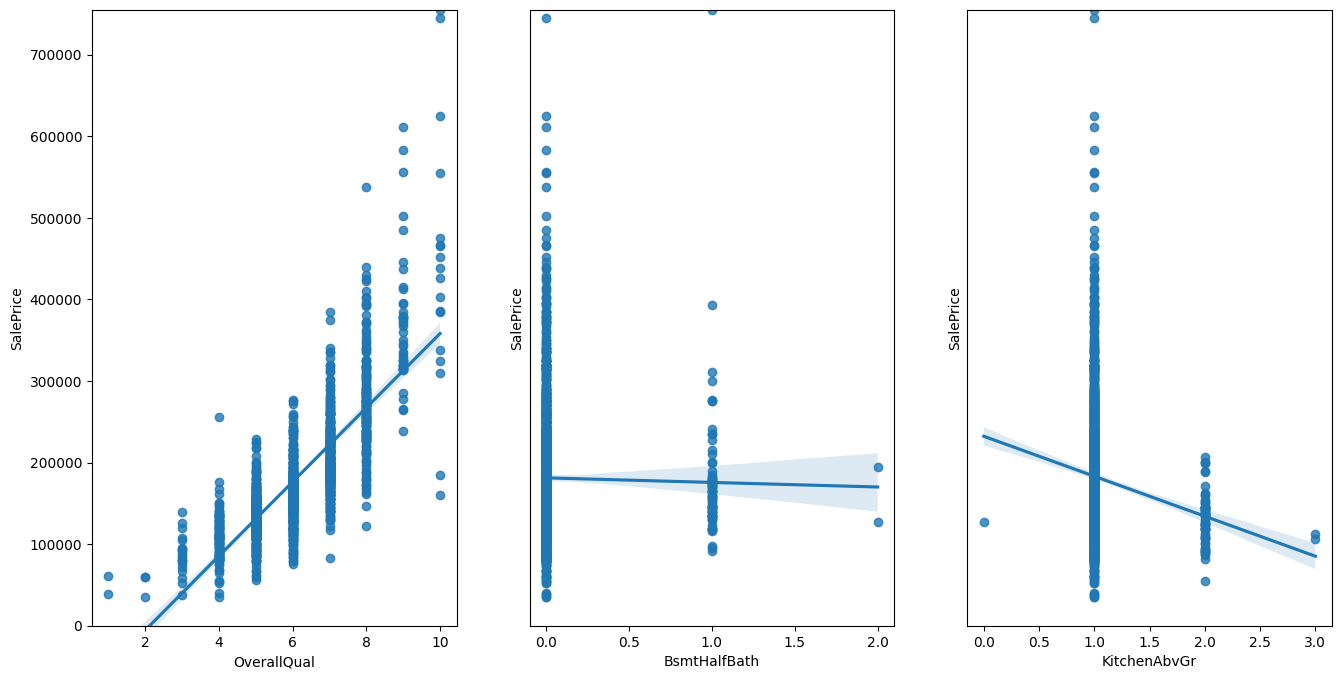

In [8]:
# Criando esse gráfico
import matplotlib.pyplot as plt
import seaborn as sns
# plot
fig, ax = plt.subplots(ncols=3,figsize=(16,8))

sns.regplot(data=treino,x=treino.OverallQual, y=treino.SalePrice,ax=ax[0])
sns.regplot(data=treino,x=treino.BsmtHalfBath, y=treino.SalePrice,ax=ax[1])
sns.regplot(data=treino,x=treino.KitchenAbvGr, y=treino.SalePrice,ax=ax[2])
ax[0].set(ylim=(0, treino.SalePrice.max()))
ax[1].set(ylim=(0, treino.SalePrice.max()),yticks=[])
ax[2].set(ylim=(0, treino.SalePrice.max()),yticks=[])
plt.show()

- **E para as variáveis categóricas, podemos analisar se alguma delas possuem valores recorrentes**
    - Farei a separação em Casas Caras e Baratas

In [9]:
# Selecionando as colunas de texto
obj_cols=treino.columns[treino.dtypes=='object']
obj_cols

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'BsmtFinSF2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [10]:
# Visualizando as casas mais caras
caras=treino.sort_values('SalePrice').tail(10)
caras=caras[obj_cols]
caras.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
798,RL,Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,...,BuiltIn,Fin,TA,TA,Y,-1,-1,-1,New,Partial
178,RL,Pave,-1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,...,Attchd,Fin,TA,TA,Y,-1,-1,-1,New,Partial


In [11]:
#As casas mais baratas
baratas=treino.sort_values('SalePrice').head(10)
baratas=baratas[obj_cols]
baratas.head(2)

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
495,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,-1,-1,-1,-1,N,-1,GdWo,-1,WD,Abnorml
916,C (all),Pave,-1,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,...,Detchd,Unf,TA,TA,Y,-1,-1,-1,WD,Abnorml


In [12]:
# Verificando, das casas caras, valores que muito se repetem (muitos valores iguais)
caras_val=caras.nunique()
caras_val.head(2)

MSZoning    1
Street      1
dtype: int64

In [13]:
# Verificando agora para as casas mais baratas
baratas_val=baratas.nunique()
baratas_val.head(2)

MSZoning    3
Street      2
dtype: int64

In [14]:
# Podemos unir esses valores
rep=pd.concat([caras_val,baratas_val],axis=1).sort_values([0,1])
rep.head(10)

,0,1
Utilities,1,1
Condition2,1,1
Street,1,2
Condition1,1,2
BldgType,1,2
Heating,1,2
CentralAir,1,2
GarageQual,1,2
PavedDrive,1,2
MSZoning,1,3


In [15]:
# Agora visualizando essas colunas que mais se repetem para as casas mais caras
caras[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning,...,MasVnrType,FireplaceQu,LotShape,LotConfig,Neighborhood,BsmtExposure,SaleCondition,BsmtFinType1,Exterior1st,Exterior2nd
798,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,Reg,Inside,NridgHt,No,Partial,Unf,VinylSd,VinylSd
178,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,IR1,CulDSac,StoneBr,No,Partial,GLQ,VinylSd,VinylSd
769,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,BrkFace,Gd,IR2,CulDSac,StoneBr,Gd,Normal,ALQ,CemntBd,Wd Shng
440,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,Reg,Inside,NridgHt,Gd,Normal,GLQ,VinylSd,VinylSd
1046,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,IR1,Inside,StoneBr,Av,Partial,GLQ,CemntBd,CmentBd
803,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,Reg,Inside,NridgHt,Gd,Partial,Unf,VinylSd,VinylSd
898,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,Stone,Gd,IR1,Inside,NridgHt,Gd,Partial,GLQ,VinylSd,VinylSd
1169,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,BrkFace,TA,IR1,CulDSac,NoRidge,Gd,Normal,GLQ,HdBoard,HdBoard
1182,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,None,TA,IR1,Corner,NoRidge,Av,Abnorml,GLQ,Wd Sdng,ImStucc
691,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,TA,Y,RL,...,BrkFace,Ex,IR1,Corner,NoRidge,Gd,Normal,GLQ,HdBoard,HdBoard


In [16]:
# E para as mais baratas
baratas[rep.index]

,Utilities,Condition2,Street,Condition1,BldgType,Heating,CentralAir,GarageQual,PavedDrive,MSZoning,...,MasVnrType,FireplaceQu,LotShape,LotConfig,Neighborhood,BsmtExposure,SaleCondition,BsmtFinType1,Exterior1st,Exterior2nd
495,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,C (all),...,None,-1,Reg,Inside,IDOTRR,No,Abnorml,Rec,Wd Sdng,Wd Sdng
916,AllPub,Norm,Pave,Norm,1Fam,GasA,N,TA,Y,C (all),...,None,-1,Reg,Inside,IDOTRR,Av,Abnorml,BLQ,AsbShng,AsbShng
968,AllPub,Norm,Pave,Norm,1Fam,Grav,N,-1,Y,RM,...,None,-1,Reg,Inside,OldTown,No,Abnorml,Unf,VinylSd,VinylSd
533,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RL,...,None,-1,Reg,Inside,BrkSide,-1,Normal,-1,VinylSd,VinylSd
30,AllPub,Norm,Pave,Feedr,1Fam,GasA,N,TA,N,C (all),...,None,-1,Reg,Inside,IDOTRR,No,Normal,Unf,BrkFace,BrkFace
710,AllPub,Norm,Pave,Norm,1Fam,GasA,Y,-1,N,RL,...,None,-1,IR1,Inside,BrkSide,No,Normal,Unf,VinylSd,VinylSd
1337,AllPub,Norm,Pave,Feedr,1Fam,Grav,N,-1,N,RM,...,None,-1,IR1,Corner,OldTown,No,Normal,Unf,Wd Sdng,Wd Sdng
705,AllPub,Norm,Pave,Norm,2fmCon,GasA,N,-1,N,RM,...,None,-1,Reg,Inside,IDOTRR,-1,Normal,-1,VinylSd,Wd Shng
1325,AllPub,Norm,Pave,Norm,1Fam,GasA,N,-1,N,RM,...,None,-1,Reg,Inside,IDOTRR,No,Normal,Unf,AsbShng,AsbShng
812,AllPub,Norm,Grvl,Norm,1Fam,GasA,N,TA,N,C (all),...,None,-1,Reg,Inside,IDOTRR,Av,Alloca,Unf,Wd Sdng,Wd Sdng


## Agora podemos investigar melhor essas principais colunas
- As columas que mais chamaram atenção foram:
    - [Utilities](#Utilities)
    - [CentralAir](#CentralAir)
    - [PavedDrive](#PavedDrive)
    - [MSZoning](#MSZoning)
    - [GarageQual](#GarageQual)
- Irei analisar caso a caso.

<a id="Utilities"></a>
- <font color="blue">**Começando primeiramente analisando a coluna "Utilities"**</font>

In [17]:
# Verificando os valores nessa coluna para a base de treino
treino.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [18]:
# E para a base de teste
teste.Utilities.value_counts()

AllPub    1459
Name: Utilities, dtype: int64

- Como observado acima, verificamos que essa coluna não trará nenhuma melhora na nossa base.

In [19]:
# Eliminando essa coluna nas 2 bases
treino=treino.drop('Utilities',axis=1)
teste=teste.drop('Utilities',axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="CentralAir"></a>
- <font color="blue">**Analisando a coluna "CentralAir"**</font>
- Na visualização das colunas caras e baratas, verificamos que as 10 casas mais caras possuem ar condicionado e das 10 casas mais baratam, 9 não possuem ar condicionado.

In [20]:
# Verificando os valores nessa coluna
treino.CentralAir.value_counts()

Y    1365
N      95
Name: CentralAir, dtype: int64

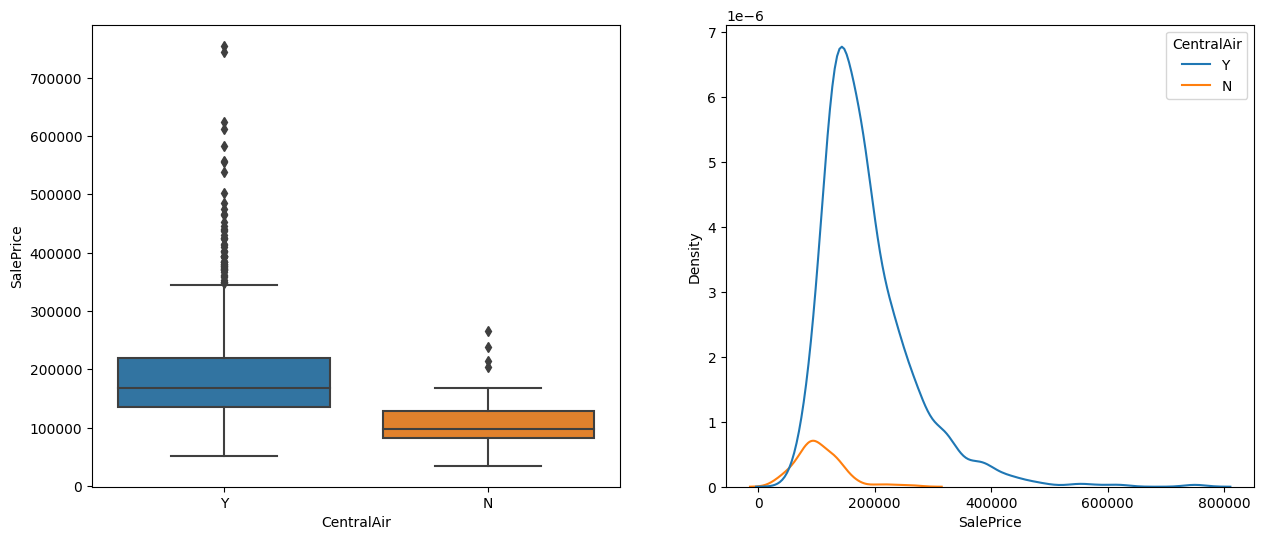

In [21]:
# Visualizando se a hipótese graficamente
# plot
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.boxplot(data=treino,x=treino.CentralAir, y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino.CentralAir,ax=ax[1])
plt.show()

- O valor "N", apesar de aparecer na maioria das casas de menor valor, não é um valor tão frequente

- **Podemos transformar essa coluna simplesmente colocando tudo que for Y como 1 e N como 0**

In [22]:
# Substituindo os valores na base de treino e teste
treino['CentralAir']=treino.CentralAir.apply(lambda x:1 if x=="Y" else 0)
teste['CentralAir']=teste.CentralAir.apply(lambda x:1 if x=="Y" else 0)

<a id="PavedDrive"></a>
- <font color="blue">**E também analisar a coluna "PavedDrive"** (calçada pavimentada)</font>
    - Y: Paved 
    - P: Partial Pavement
    - N: Dirt/Gravel

In [23]:
# Verificando os valores nessa coluna
treino.PavedDrive.value_counts()

Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

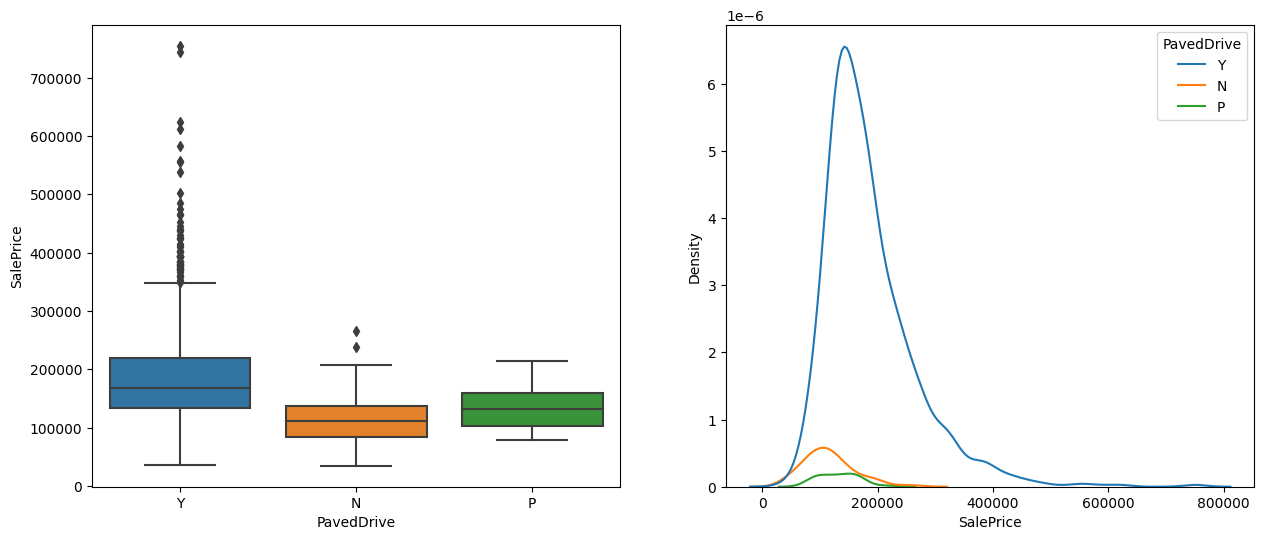

In [24]:
# Verificando a relação desses valores com o preço da casa
coluna='PavedDrive'
# plot
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.boxplot(data=treino,x=treino[coluna], y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino[coluna],ax=ax[1])

plt.show()

- **Criando uma função capaz de transformar esses valores de texto em números**

In [25]:
# Criando a função
def DefinePD(x):
    if x =='Y':
        return 1
    elif x =='N':
        return 0
    elif x=='P':
        return 0.5
    else:
        return -1

In [26]:
# Aplicando essa função na base de treino e teste
treino['PavedDrive']=treino.PavedDrive.apply(DefinePD)
teste['PavedDrive']=teste.PavedDrive.apply(DefinePD)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="MSZoning"></a>
- <font color="blue">**Agora podemos entender a relação do "MSZoning" com o preço**</font>

In [27]:
# Fazendo um groupby desses dados para ver a média
treino.groupby('MSZoning')['SalePrice'].mean()

MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

In [28]:
# Visualizando também mínimo, máximo e contagem
treino.groupby('MSZoning')['SalePrice'].describe()

,count,mean,std,min,25%,50%,75%,max
MSZoning,,,,,,,,
C (all),10.0,74528.000000,33791.092031,34900.0,43998.25,74700.0,98332.0,133900.0
FV,65.0,214014.061538,52369.662067,144152.0,174000.00,205950.0,250000.0,370878.0
RH,16.0,131558.375000,35714.118435,76000.0,106150.00,136500.0,148608.5,200000.0
RL,1151.0,191004.994787,80766.341319,39300.0,137700.00,174000.0,224700.0,755000.0
RM,218.0,126316.830275,48521.689833,37900.0,100000.00,120500.0,140000.0,475000.0


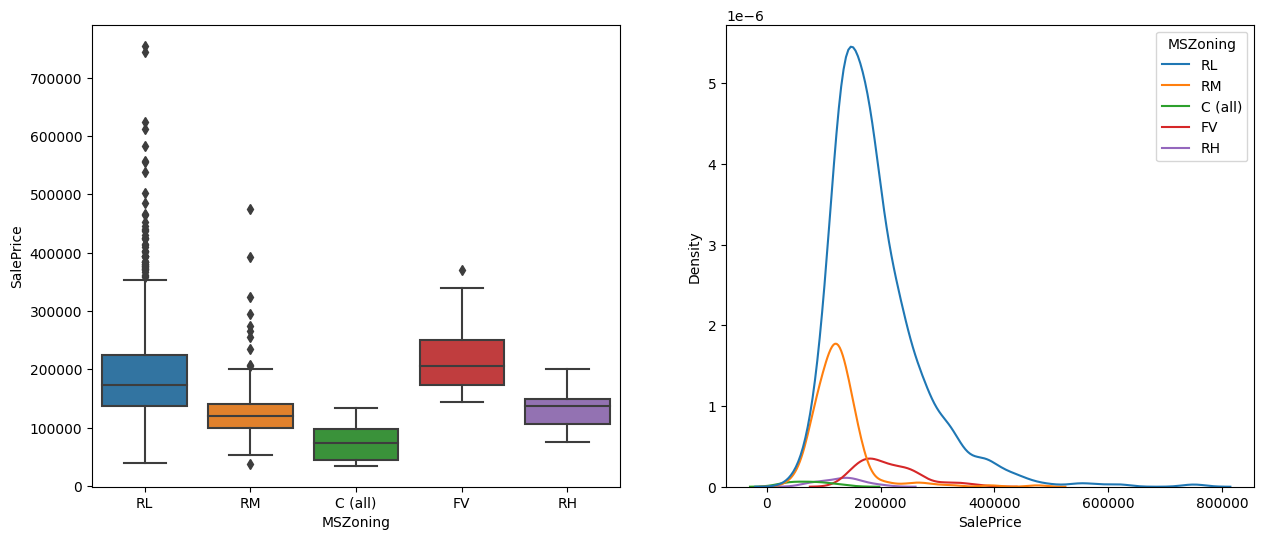

In [29]:
# Podemos inclusive visualizar a distribuição desses valores
coluna='MSZoning'
# plot
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
sns.boxplot(data=treino,x=treino[coluna], y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino[coluna],ax=ax[1])

plt.show()

- **Para resolver o problema de variáveis textuais, podemos utilizar agora o OneHotEncoder e transformar cada um desses valores em uma nova coluna**
    - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [30]:
# Importando, criando o encoder para essa coluna e fazendo o fit
from sklearn.preprocessing import OneHotEncoder
ohe_MSZoning = OneHotEncoder(handle_unknown='ignore').fit(treino[['MSZoning']])

In [31]:
# Transformando os dados
ohe_MSZoning.transform(treino[['MSZoning']]).toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
# Podemos transformar isso em um DataFrame do pandas
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(treino[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())
ohe_MSZoning_df.head(2)

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0


In [33]:
# Unindo essa coluna com a base
treino = pd.concat([treino,ohe_MSZoning_df],axis=1)

In [34]:
# Eliminando a coluna "MSZoning"
treino = treino.drop('MSZoning',axis=1)

- Agora utilizando o mesmo encoder para a **<font color='blue'>base de teste</font>**

In [35]:
# Fazendo a transformação
ohe_MSZoning.transform(teste[['MSZoning']]).toarray()

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.]])

In [36]:
# Transformando em um DataFrame (podemos sobrescrever essa variável)
ohe_MSZoning_df = pd.DataFrame(ohe_MSZoning.transform(teste[['MSZoning']]).toarray(),
                              columns=ohe_MSZoning.get_feature_names_out())

In [37]:
# Unindo essa coluna com a base de teste
teste = pd.concat([teste,ohe_MSZoning_df],axis=1)

In [38]:
# Eliminando a coluna "MSZoning"
teste = teste.drop('MSZoning',axis=1)

<p style='text-align: right;'><a href="#colunas">Voltar</a></p>

<a id="GarageQual"></a>
- <font color="blue">**Analisando as informações sobre garagem, começando pela "GarageQual"**</font>
    - Ex: Excellent
    - Gd: Good
    - TA: Typical/Average
    - Fa: Fair
    - Po: Poor
    - NA: No Garage -> lembrando que já substituimos esse valor por -1

In [39]:
# Verificando os valores nessa coluna
treino.GarageQual.value_counts()

TA    1311
-1      81
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

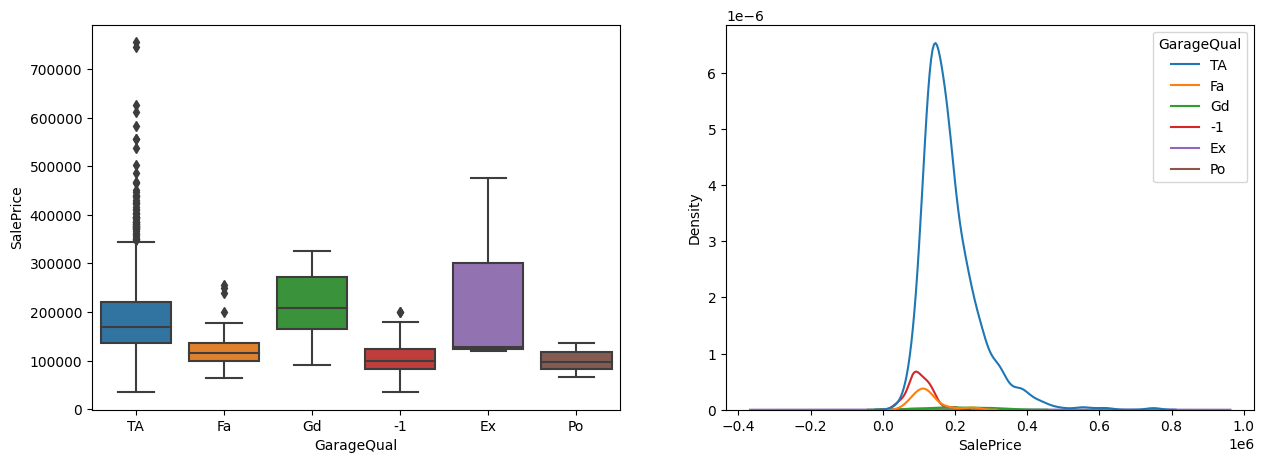

In [40]:
# Visualizando graficamente
coluna = 'GarageQual'

fig, ax = plt.subplots(ncols=2,figsize=(15,5))

sns.boxplot(x=treino[coluna],y=treino.SalePrice,ax=ax[0])
sns.kdeplot(x=treino.SalePrice,hue=treino[coluna],ax=ax[1])

plt.show()

- Existem muitas colunas separadas, Irei verificar se não faz sentido fazer uma análise só para todas as colunas.

In [41]:
# Verificando as colunas que possuem garagem no nome
cols_garagem = treino.columns[treino.columns.str.contains('Garage')]
cols_garagem

Index(['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond'],
      dtype='object')

- Verificando se não existem overfitting das informações nas colunas 'GarageQual' e 'GarageCond'

In [42]:
#Verificando a % de dados iguais entre as duas colunas
treino[treino.GarageQual == treino.GarageCond].shape[0]/treino.shape[0]

0.9595890410958904

- **Podemos apagar a coluna "GarageCond" pois a informação nessa coluna diz basicamente a mesma coisa que a coluna "GarageQual"** 

In [43]:
# Apagando a coluna GarageCond
treino = treino.drop('GarageCond',axis=1)

- **Da mesma forma, também podemos analisar a relação entre "GarageCars" e "GarageArea"**

In [44]:
# Analisando a correlação entre as duas colunas e o preço
treino[['GarageCars','GarageArea','SalePrice']].corr()

,GarageCars,GarageArea,SalePrice
GarageCars,1.000000,0.882475,0.640409
GarageArea,0.882475,1.000000,0.623431
SalePrice,0.640409,0.623431,1.000000


In [45]:
# Eliminando a coluna GarageArea
treino = treino.drop('GarageArea',axis=1)

- **Podemos continuar tratando as colunas de garagem, mas relacionando com outras informações da base como "YearBuilt" e "YearRemodAdd"**

In [46]:
# Analisando a correlação entre as datas de construção
treino.loc[treino.GarageYrBlt != -1,['GarageYrBlt','YearBuilt','YearRemodAdd','SalePrice']].corr()

,GarageYrBlt,YearBuilt,YearRemodAdd,SalePrice
GarageYrBlt,1.000000,0.825667,0.642277,0.486362
YearBuilt,0.825667,1.000000,0.618058,0.507584
YearRemodAdd,0.642277,0.618058,1.000000,0.505434
SalePrice,0.486362,0.507584,0.505434,1.000000


In [47]:
# Por existir uma correlação, também podemos eliminar essa coluna de GarageYrBlt
treino = treino.drop('GarageYrBlt',axis=1)

- **Por fim, podemos continuar tratando as colunas de garagem ou apenas transformar o restante das colunas de texto**
    - Utilizando o OneHotEncoder para a coluna "GarageType"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    - E o OrdinalEncoder para as colunas "GarageFinish" e "GarageQual"
        - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

In [48]:
# Visualizando os valores em "GarageType"
treino.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
-1          81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [49]:
# Criando um encoder para GarageType e fazendo o Fit
ohe_GarageType = OneHotEncoder(handle_unknown='ignore',
                              min_frequency=25).fit(treino[['GarageType']])

In [50]:
# Fazendo o transform já em um DataFrame
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(treino[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())

In [51]:
# Unindo essa coluna com a base e eliminando a coluna "GarageType"
treino = pd.concat([treino,ohe_GarageType_df],axis=1)
treino = treino.drop('GarageType',axis=1)

- Fazendo o OrdinalEncoder para as outras 2 colunas, incialmente fazendo uma lista para os valores de acordo com o data_description.txt
 

In [52]:
# Criando a lista de ordem dos valores
GarageFinish_oe = ['Unf','RFn','Fin']
GarageQual_oe = ['Po','Fa','TA','Gd','Ex']

In [53]:
# Importando o OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
oe_garagem = OrdinalEncoder(categories=[GarageFinish_oe,GarageQual_oe],
                   handle_unknown='use_encoded_value',
                   unknown_value=-1, dtype='int64').fit(treino[['GarageFinish','GarageQual']])

In [54]:
# Transformando
oe_garagem.transform(treino[['GarageFinish','GarageQual']])

array([[1, 2],
       [1, 2],
       [1, 2],
       ...,
       [1, 2],
       [0, 2],
       [2, 2]], dtype=int64)

In [55]:
# Substituindo na base de treino
treino[['GarageFinish','GarageQual']] = oe_garagem.transform(treino[['GarageFinish','GarageQual']])

- Fazendo todos os tratamentos para a **<font color='blue'>base de teste</font>**

In [56]:
# Apagando as coluna "GarageCond", "GarageArea", "GarageYrBlt"
teste = teste.drop('GarageCond',axis=1)
teste = teste.drop('GarageArea',axis=1)
teste = teste.drop('GarageYrBlt',axis=1)

In [57]:
# Utilizando o encoder do 'GarageType'
ohe_GarageType_df = pd.DataFrame(ohe_GarageType.transform(teste[['GarageType']]).toarray(),
                              columns=ohe_GarageType.get_feature_names_out())

teste = pd.concat([teste,ohe_GarageType_df],axis=1)

teste = teste.drop('GarageType',axis=1)

In [58]:
# Utilizando o OrdinalEncoder para as colunas 'GarageFinish' e 'GarageQual'
teste[['GarageFinish','GarageQual']] = oe_garagem.transform(teste[['GarageFinish','GarageQual']])

In [59]:
# Exportando a base até esse momento
treino.to_csv('train_3_1.csv',index=False)
teste.to_csv('test_3_1.csv',index=False)